In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
data = pd.read_csv("House_Rent_Dataset.csv")

In [20]:
data.head

<bound method NDFrame.head of        Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/F

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [22]:
data.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [23]:
data.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [25]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x18e7b9c99a0>,
 'caps': [<matplotlib.lines.Line2D at 0x18e7b9c9e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x18e7b9c96d0>],
 'medians': [<matplotlib.lines.Line2D at 0x18e7b9da400>],
 'fliers': [<matplotlib.lines.Line2D at 0x18e7b9da6d0>],
 'means': []}

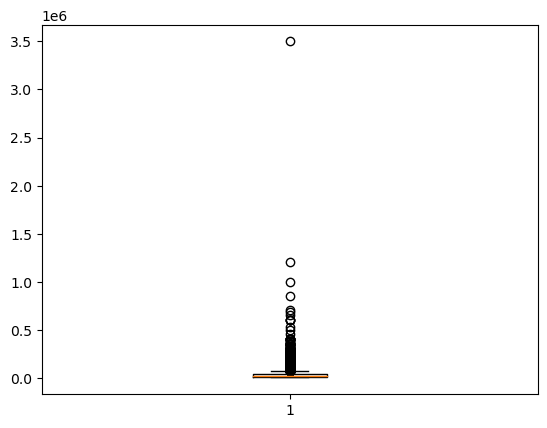

In [26]:
# Check for outliers using boxplot
plt.boxplot(data['Rent'])

In [27]:
# Remove outliers by keeping values within the 1st and 99th percentiles
q_low = data["Rent"].quantile(0.01)
q_hi  = data["Rent"].quantile(0.99)

data = data[(data["Rent"] < q_hi) & (data["Rent"] > q_low)]

{'whiskers': [<matplotlib.lines.Line2D at 0x18e7ba33b80>,
 'caps': [<matplotlib.lines.Line2D at 0x18e7ba43160>,
 'boxes': [<matplotlib.lines.Line2D at 0x18e7ba338b0>],
 'medians': [<matplotlib.lines.Line2D at 0x18e7ba43700>],
 'fliers': [<matplotlib.lines.Line2D at 0x18e7ba439d0>],
 'means': []}

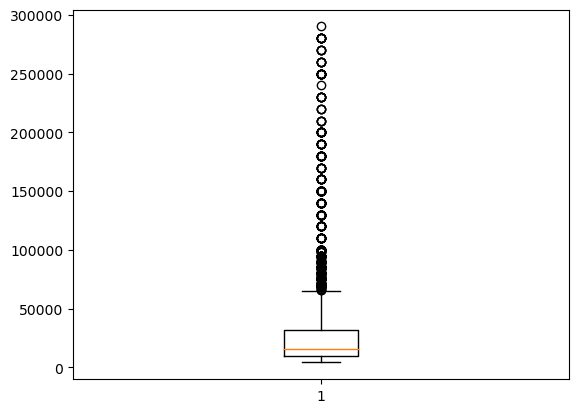

In [28]:
# Check for outliers using boxplot
plt.boxplot(data['Rent'])

In [29]:
#Correlation
data.corr()

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.482952,0.701844,0.781175
Rent,0.482952,1.000000,0.488030,0.600199
Size,0.701844,0.488030,1.000000,0.724980
Bathroom,0.781175,0.600199,0.724980,1.000000


In [30]:
# Split the data into predictor (x) and target (y) variables
X = data[['BHK', 'Size', 'Bathroom']]  # Adjust the features accordingly
y = data['Rent']

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Step 5: Evaluate the models and compare their respective scores
# Evaluate linear regression model
y_pred_linear = linear_reg_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

In [34]:
print("Linear Regression - R2 Score:", r2_linear)
print("Linear Regression - RMSE:", rmse_linear)

Linear Regression - R2 Score: 0.3925370879816341
Linear Regression - RMSE: 29325.39884335202
